# Dashboard

[Rainy Lake & Namakan Lake Data and Information](http://www.lwcb.ca/rlwwb-temp/)


### Table of Contents

* [Webcam](#Webcam)

<a id="Webcam"></a>
### Rainy Lake Webcam

![](http://www.rainylakeonestop.com/netcam.jpg)



[Rainy River and Manitou Rapids](http://waterdata.usgs.gov/mn/nwis/uv?site_no=05133500)

[Rain](http://waterdata.usgs.gov/mn/nwis/uv/?dd_cd=06_00060&format=img_default&site_no=05133500&period=7)

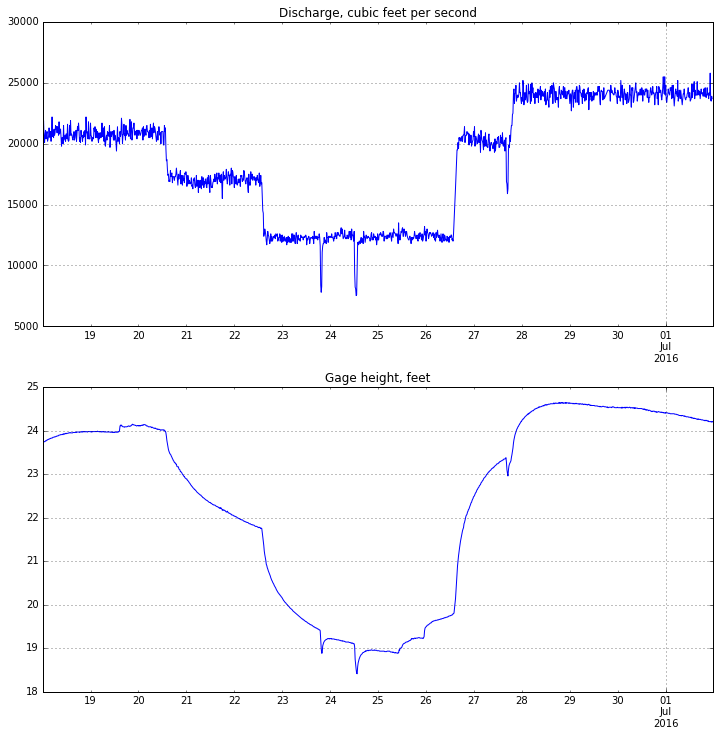

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

import json
import urllib2
import pandas as pd

def usgs_waterservices(site,parameters,period):
        
    urlstr = 'http://waterservices.usgs.gov/nwis/iv/?format=json'
    urlstr += '&site=' + site
    urlstr += '&period=' + period
    if type(parameters) is list:
        urlstr += '&parameterCd=' + ','.join(parameters)
    else:
        urlstr += '&parameterCd=' + parameters
    
    timeSeries = json.load(urllib2.urlopen(urlstr))['value']['timeSeries']
    
    df = []
    
    for data in timeSeries:
        siteName = str(data['sourceInfo']['siteName'])

        units = str(data['variable']['unit']['unitCode'])
        description = str(data['variable']['variableDescription'])

        series = data['values'][0]['value']
        dateTime = [str(a['dateTime']) for a in series]
        values = [float(a['value']) for a in series]

        df.append(pd.DataFrame(values, pd.to_datetime(dateTime), columns=[description]))
        
    return pd.concat(df,axis=1)

#df =usgs('05133500',['00011','00060','00065'],'P14D')
df =usgs_waterservices('05129515',['00060','00065'],'P14D')

fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(12,12))

for k in range(len(df.columns)):
    df.ix[:,k].plot(ax=axes[k])
    y1,y2 = axes[k].get_ylim()
    axes[k].set_title(df.columns[k])
    axes[k].grid()

{u'noDataValue': -999999.0,
 u'note': [],
 u'oid': u'45807202',
 u'options': {u'option': [{u'name': u'Statistic', u'optionCode': u'00011'}]},
 u'unit': {u'unitCode': u'ft'},
 u'valueType': u'Derived Value',
 u'variableCode': [{u'default': True,
                    u'network': u'NWIS',
                    u'value': u'00065',
                    u'variableID': 45807202,
                    u'vocabulary': u'NWIS:UnitValues'}],
 u'variableDescription': u'Gage height, feet',
 u'variableName': u'Gage height, ft',
 u'variableProperty': []}


In [69]:
from bs4 import BeautifulSoup
import ssl
import requests

url = 'http://wateroffice.ec.gc.ca/report/report_e.html?mode=Table&type=realTime'
url += '&stn=05PB007&dataType=&startDate=2016-06-25&endDate=2016-07-02&prm1=46&prm2=47'

payload = {'action':'/include/disclaimer.php',
          'disclaimer_action':'I Agree'}

session = requests.Session()
r = session.post(url,payload,verify=False)
#r = requests.post(url,payload,verify=False)
r.text
r = session.post(url,payload,verify=False)
r.text

u'<!DOCTYPE html>\n\n<!--[if IE 7]><html lang="en" class="no-js ie7"><![endif]-->\n<!--[if IE 8]><html lang="en" class="no-js ie8"><![endif]-->\n<!--[if gt IE 8]><!-->\n<html lang="en" class="no-js">\n<!--<![endif]-->\n\n<head>\n<meta charset="utf-8" />\n<!-- Web Experience Toolkit (WET) / Bo\xc3\xaete \xc3\xa0 outils de l\'exp\xc3\xa9rience Web (BOEW)\nwet-boew.github.io/wet-boew/License-eng.txt / wet-boew.github.io/wet-boew/Licence-fra.txt -->\n<title>Disclaimer for Hydrometric Information - WaterOffice - Environment Canada</title>\n\n<link rel="shortcut icon" href="/wet-boew/dist/theme-gcwu-fegc/images/favicon.ico" />\n\n<!-- METADATA BEGINS | DEBUT DES METADONNEES -->\n<meta name="dcterms.creator" content="Environment Canada" />\n<meta name="dcterms.title" content="Disclaimer for Hydrometric Information - WaterOffice - Environment Canada" />\n<meta name="dcterms.issued" title="W3CDTF" content="2011-10-31" />\n<meta name="dcterms.modified" title="W3CDTF" content="2014-06-05" />\n<me

In [57]:
gcontext = ssl.SSLContext(ssl.PROTOCOL_TLSv1)  # Only for gangstars

page = urllib2.urlopen(url,context=gcontext).read()
print page
soup = BeautifulSoup(page,'lxml')



<!DOCTYPE html>

<!--[if IE 7]><html lang="en" class="no-js ie7"><![endif]-->
<!--[if IE 8]><html lang="en" class="no-js ie8"><![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en" class="no-js">
<!--<![endif]-->

<head>
<meta charset="utf-8" />
<!-- Web Experience Toolkit (WET) / Boîte à outils de l'expérience Web (BOEW)
wet-boew.github.io/wet-boew/License-eng.txt / wet-boew.github.io/wet-boew/Licence-fra.txt -->
<title>Disclaimer for Hydrometric Information - WaterOffice - Environment Canada</title>

<link rel="shortcut icon" href="/wet-boew/dist/theme-gcwu-fegc/images/favicon.ico" />

<!-- METADATA BEGINS | DEBUT DES METADONNEES -->
<meta name="dcterms.creator" content="Environment Canada" />
<meta name="dcterms.title" content="Disclaimer for Hydrometric Information - WaterOffice - Environment Canada" />
<meta name="dcterms.issued" title="W3CDTF" content="2011-10-31" />
<meta name="dcterms.modified" title="W3CDTF" content="2014-06-05" />
<meta name="dcterms.subject" title="scheme" cont

/Users/jeff/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:791: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [58]:
r.text
#print(soup.prettify())

u'<!DOCTYPE html>\n\n<!--[if IE 7]><html lang="en" class="no-js ie7"><![endif]-->\n<!--[if IE 8]><html lang="en" class="no-js ie8"><![endif]-->\n<!--[if gt IE 8]><!-->\n<html lang="en" class="no-js">\n<!--<![endif]-->\n\n<head>\n<meta charset="utf-8" />\n<!-- Web Experience Toolkit (WET) / Bo\xc3\xaete \xc3\xa0 outils de l\'exp\xc3\xa9rience Web (BOEW)\nwet-boew.github.io/wet-boew/License-eng.txt / wet-boew.github.io/wet-boew/Licence-fra.txt -->\n<title>Disclaimer for Hydrometric Information - WaterOffice - Environment Canada</title>\n\n<link rel="shortcut icon" href="/wet-boew/dist/theme-gcwu-fegc/images/favicon.ico" />\n\n<!-- METADATA BEGINS | DEBUT DES METADONNEES -->\n<meta name="dcterms.creator" content="Environment Canada" />\n<meta name="dcterms.title" content="Disclaimer for Hydrometric Information - WaterOffice - Environment Canada" />\n<meta name="dcterms.issued" title="W3CDTF" content="2011-10-31" />\n<meta name="dcterms.modified" title="W3CDTF" content="2014-06-05" />\n<me

In [56]:
pprint(description)
pprint(dateTime)
pprint(value)
pprint(units)

NameError: name 'pprint' is not defined